In [34]:
import sys
sys.path.append("../scripts/")
from robot import *

<IPython.core.display.Javascript object>


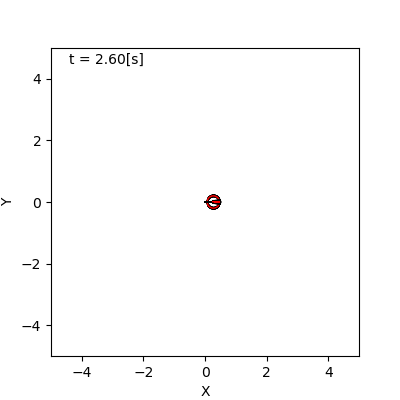

In [35]:
import copy

world = World(40.0, 0.1)

initial_pose = np.array([0, 0, 0]).T
robots = []
r = Robot(initial_pose, sensor=None, agent=Agent(0.1, 0.0))
for i in range(10):
    cr = copy.copy(r)
    cr.distance_until_noise = cr.noise_pdf.rvs()
    world.append(cr)
    robots.append(cr)

r = IdealRobot(initial_pose, sensor=None, agent=Agent(0.1, 0.0), color='red')
world.append(r)
robots.append(r)

world.draw()

In [31]:
import pandas as pd
poses = pd.DataFrame([[math.sqrt(r.pose[0]**2 + r.pose[1]**2), r.pose[2]] for r in robots],
                     columns=['r', 'theta'])
poses.transpose()                      

,0,1,2,3,4,5,6,7,8,9,10
r,3.264841,3.266217,3.159449,3.268008,3.254620,3.259892,3.265903,3.265458,3.257946,3.261083,4.02
theta,0.081896,-0.163653,0.675409,-0.026579,0.259995,-0.289692,-0.230488,0.092479,0.116160,-0.071468,0.00


In [32]:
theta_var = poses["theta"].var()
r_mean = poses["r"].mean()
theta_per_r_var = theta_var/r_mean
std_wv =  math.sqrt(theta_per_r_var)
print("Θの分散 = ", theta_var)
print("rの平均 = ", r_mean)
print("1移動あたりωの分散 = ", theta_per_r_var)
print("標準偏差σων = ", std_wv)

Θの分散 =  0.0704243646461213
rの平均 =  3.3221287776948585
1移動あたりωの分散 =  0.021198565545971097
標準偏差σων =  0.14559727176692253
